In [1]:
using NMR

┌ Info: Precompiling NMR [29608d60-07d6-11ea-0b49-239cc88e4b20]
└ @ Base loading.jl:1273
┌ Info: Skipping precompilation since __precompile__(false). Importing NMR [29608d60-07d6-11ea-0b49-239cc88e4b20].
└ @ Base loading.jl:1028


HMDB initialised from /Users/mu3q/Dropbox/Source/NMR.jl/src
Module NMR
(c)mu 2018,2019,2020


In [2]:
?Data1D

search: Data1D



No documentation found.

`NMR.Data1D` is of type `UnionAll`.

# Summary

```
struct UnionAll <: Type{T}
```

# Fields

```
var  :: TypeVar
body :: Any
```

# Supertype Hierarchy

```
UnionAll <: Type{T} <: Any
```


In [3]:
a=Data1D(exp.( -(-15:0.001:15).^2),0.0,1.0)

Data1D{Float64,Float64}([1.921947727823849e-98, 1.9804777696789362e-98, 2.0407861747921766e-98, 2.1029268519836754e-98, 2.1669553404586796e-98, 2.2329288590003218e-98, 2.3009063566434074e-98, 2.3709485648739233e-98, 2.4431180513992513e-98, 2.5174792755366888e-98  …  2.5174792755366888e-98, 2.4431180513992513e-98, 2.3709485648739233e-98, 2.3009063566434074e-98, 2.2329288590003218e-98, 2.1669553404586796e-98, 2.1029268519836754e-98, 2.0407861747921766e-98, 1.9804777696789362e-98, 1.921947727823849e-98], 0.0, 1.0)

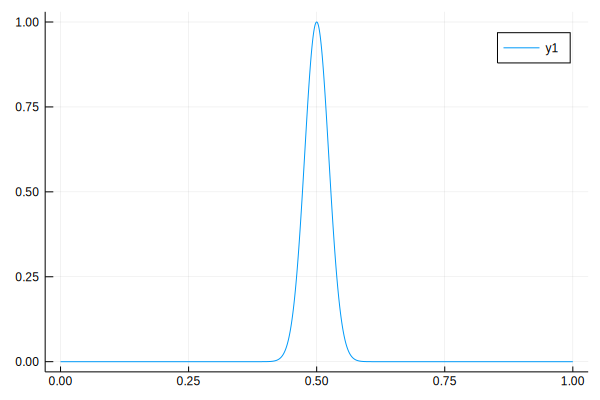

In [4]:
NMR.plot(a)

In [5]:
div(4.2,0.5)

8.0

In [6]:
convert(Integer,div(4.2e16,0.5))

84000000000000000

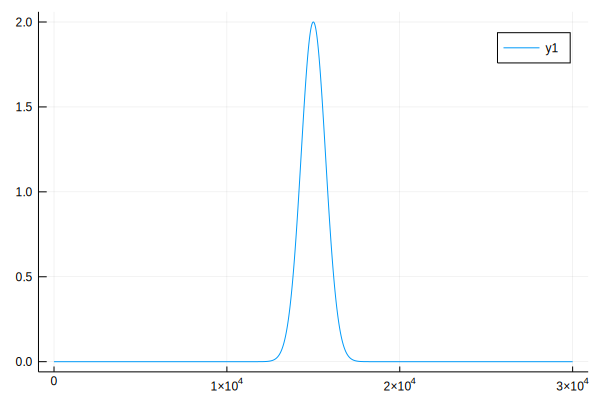

In [7]:
import Plots
Plots.plot(a.dat[1:end-1]+a.dat[2:end])

In [8]:
NMR.hard_shift(a,0.1)

Data1D{Float64,Float64}([1.9278007320093516e-98, 1.986508610190254e-98, 2.04700024251132e-98, 2.1093297008311693e-98, 2.1735526923128372e-98, 2.2397266087646234e-98, 2.307910577466452e-98, 2.378165513526449e-98, 2.4505541738129875e-98, 2.5251412125098323e-98  …  3.6707223660253935e-63, 3.5837411794623464e-63, 3.498814095523273e-63, 3.4158927720048826e-63, 3.334930000466558e-63, 3.255879679734184e-63, 3.178696790020392e-63, 3.1033373676475593e-63, 3.0297584803591547e-63, 2.957918203206786e-63], 0.1, 1.0)

In [66]:
function hard_shift(d::Data1D,δ::Number)
    # compute integer offset and fractional contribution from left
    inc=(d.istop-d.istart)/length(d.dat)
    n = -convert(Integer,div(δ,inc))
    f = mod(δ,inc)/inc
    if n>=0
        ndata=(1-f)*d.dat[(1+n):(end-1)]+f*d.dat[(2+n):end]
        nstart=d.istart
        nstop=d.istop+δ
    else
        ndata=(1-f)*d.dat[1:(end+n-1)]+f*d.dat[2:(end+n)]
        nstart=d.istart+δ
        nstop=d.istop
    end
    return Data1D(ndata,nstart,nstop)
end


hard_shift (generic function with 1 method)

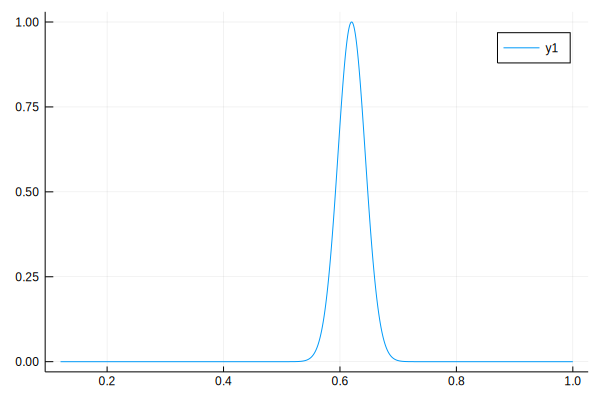

In [12]:
plot(NMR.hard_shift(a,0.12))